In [1]:

%pip install -U --quiet langgraph "langchain[openai]" langchain-community langchain-text-splitters


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
from langchain_community.document_loaders import WebBaseLoader

urls = [
    "https://lilianweng.github.io/posts/2024-11-28-reward-hacking/",
    "https://lilianweng.github.io/posts/2024-07-07-hallucination/",
    "https://lilianweng.github.io/posts/2024-04-12-diffusion-video/",
]

docs = [WebBaseLoader(url).load() for url in urls]

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [3]:
docs[0][0].page_content.strip()[:1000]

"Reward Hacking in Reinforcement Learning | Lil'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nLil'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n|\n\n\n\n\n\n\nPosts\n\n\n\n\nArchive\n\n\n\n\nSearch\n\n\n\n\nTags\n\n\n\n\nFAQ\n\n\n\n\n\n\n\n\n\n      Reward Hacking in Reinforcement Learning\n    \nDate: November 28, 2024  |  Estimated Reading Time: 37 min  |  Author: Lilian Weng\n\n\n \n\n\nTable of Contents\n\n\n\nBackground\n\nReward Function in RL\n\nSpurious Correlation\n\n\nLet’s Define Reward Hacking\n\nList of Examples\n\nReward hacking examples in RL tasks\n\nReward hacking examples in LLM tasks\n\nReward hacking examples in real life\n\n\nWhy does Reward Hacking Exist?\n\n\nHacking RL Environment\n\nHacking RLHF of LLMs\n\nHacking the Training Process\n\nHacking the Evaluator\n\nIn-Context Reward Hacking\n\n\nGeneralization of Hacking Skills\n\nPeek into Mitigations\n\nRL Algorithm Improvement\n\nDetecting Reward Hacking\n\nData Analysis of RLHF\

In [2]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

docs_list = [item for sublist in docs for item in sublist]

text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=100, chunk_overlap=50
)
doc_splits = text_splitter.split_documents(docs_list)

In [5]:
doc_splits[0].page_content.strip()

"Reward Hacking in Reinforcement Learning | Lil'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nLil'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n|\n\n\n\n\n\n\nPosts\n\n\n\n\nArchive\n\n\n\n\nSearch\n\n\n\n\nTags\n\n\n\n\nFAQ"

In [6]:
from langchain_core.vectorstores import InMemoryVectorStore
from langchain_openai import OpenAIEmbeddings

embedding = OpenAIEmbeddings(
api_key="sk-081025394d9e4f35adbb67ea07c3dae1", 
base_url="https://dashscope.aliyuncs.com/compatible-mode/v1",
model="text-embedding-v4",
check_embedding_ctx_length = False,
dimensions=1536,
    chunk_size=5  # 设置为10或更小
)

vectorstore = InMemoryVectorStore.from_documents(
    documents=doc_splits, embedding=embedding
)
retriever = vectorstore.as_retriever()

In [9]:
from langchain_chroma import Chroma  # 导入 Chroma
from langchain_openai import OpenAIEmbeddings
import os

# 确保安装了 langchain-chroma
# pip install langchain-chroma

embedding = OpenAIEmbeddings(
    api_key="sk-081025394d9e4f35adbb67ea07c3dae1", 
    base_url="https://dashscope.aliyuncs.com/compatible-mode/v1",
    model="text-embedding-v4",
    check_embedding_ctx_length=False,
    dimensions=1536,
    chunk_size=5  # 设置较小的批次大小
)

# 使用 Chroma 替代 InMemoryVectorStore
vectorstore = Chroma.from_documents(
    documents=doc_splits, 
    embedding=embedding,
    persist_directory="./chroma_db"  # 指定持久化目录
)

In [1]:
from langchain_chroma import Chroma 
from langchain_openai import OpenAIEmbeddings
embedding = OpenAIEmbeddings(
    api_key="sk-081025394d9e4f35adbb67ea07c3dae1", 
    base_url="https://dashscope.aliyuncs.com/compatible-mode/v1",
    model="text-embedding-v4",
    check_embedding_ctx_length=False,
    dimensions=1536,
    chunk_size=5  # 设置较小的批次大小
)
# 重新加载已存在的 Chroma 数据库
vectorstore = Chroma(
    persist_directory="./chroma_db",
    embedding_function=embedding
)

retriever = vectorstore.as_retriever()

In [2]:
from langchain.tools.retriever import create_retriever_tool

retriever_tool = create_retriever_tool(
    retriever,                    # 【输入】一个已经配置好的检索器（例如：向量数据库的检索器）
    "retrieve_blog_posts",        # 【工具名称】这个工具的唯一标识名（供模型内部调用）
    "Search and return information about Lilian Weng blog posts."  # 【工具描述】模型看到的说明，用于决定是否调用它
)

In [14]:
retriever_tool.invoke({"query": "types of reward hacking"})

'Why does Reward Hacking Exist?#\n\nReward hacking occurs when a reinforcement learning (RL) agent exploits flaws or ambiguities in the reward function to achieve high rewards, without genuinely learning or completing the intended task. Reward hacking exists because RL environments are often imperfect, and it is fundamentally challenging to accurately specify a reward function.\n\nDetecting Reward Hacking#\n\nIn-Context Reward Hacking#'

In [5]:
from langchain_qwq import ChatQwen,ChatQwQ
llm=ChatQwen(
    model="qwen3-235b-a22b",
    api_key="sk-081025394d9e4f35adbb67ea07c3dae1",
    base_url="https://dashscope.aliyuncs.com/compatible-mode/v1",
    enable_thinking=False
)

In [6]:
llm.invoke("你好")

AIMessage(content='你好！有什么问题我可以帮助你吗？😊', additional_kwargs={'refusal': None, 'reasoning_content': ''}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 13, 'total_tokens': 23, 'completion_tokens_details': None, 'prompt_tokens_details': None}, 'model_name': 'qwen3-235b-a22b', 'system_fingerprint': None, 'id': 'chatcmpl-7272e5b2-e1ba-97bd-8781-7fd3b2a57d09', 'service_tier': None, 'finish_reason': 'stop', 'logprobs': None}, id='run--f306a234-a743-41b5-a05d-916ecf95cab5-0', usage_metadata={'input_tokens': 13, 'output_tokens': 10, 'total_tokens': 23, 'input_token_details': {}, 'output_token_details': {}})

In [11]:
from langchain_community.chat_models import ChatTongyi
llm = ChatTongyi(
    model="qwen3-235b-a22b",
    api_key="sk-081025394d9e4f35adbb67ea07c3dae1",
    base_url="https://dashscope.aliyuncs.com/compatible-mode/v1",
    model_kwargs={"enable_thinking": False}   # 关键在这里
)

In [12]:
llm.invoke("你好")

AIMessage(content='你好！有什么我可以帮你的吗？😊', additional_kwargs={'reasoning_content': ''}, response_metadata={'model_name': 'qwen3-235b-a22b', 'finish_reason': 'stop', 'request_id': '1150911e-e1a3-9669-9643-22e9313c28ef', 'token_usage': {'input_tokens': 13, 'output_tokens': 9, 'total_tokens': 22}}, id='run--cdf0b314-3a6b-43a4-baea-d2983ec2f0cd-0')

In [13]:
from langgraph.graph import MessagesState

def generate_query_or_respond(state: MessagesState):
    """调用模型，根据当前状态生成响应。根据问题，模型将决定是使用检索工具进行检索，还是直接回复用户。
    """
    response = (
        llm
        .bind_tools([retriever_tool]).invoke(state["messages"])
    )
    return {"messages": [response]}

In [42]:
input = {"messages": [{"role": "user", "content": "你好!"}]}
generate_query_or_respond(input)["messages"][-1].pretty_print()

================================== Ai Message ==================================

你好！有什么我可以帮你的吗？


In [14]:
input = {
    "messages": [
        {
            "role": "user",
            "content": "What does Lilian Weng say about types of reward hacking?",
        }
    ]
}
generate_query_or_respond(input)["messages"][-1].pretty_print()

================================== Ai Message ==================================
Tool Calls:
  retrieve_blog_posts (call_7268dc6deb1144d18f896f)
 Call ID: call_7268dc6deb1144d18f896f
  Args:
    query: types of reward hacking


In [24]:
from pydantic import BaseModel, Field
from typing import Literal

# 定义评分提示模板
GRADE_PROMPT = (
    "你是一个评分员，负责评估检索到的文档与用户问题的相关性。\n "
    "以下是检索到的文档内容：\n\n {context} \n\n"
    "以下是用户的问题：{question} \n"
    "如果文档包含与用户问题相关的关键词或语义含义，则将其评为相关。\n"
    "请给出一个二元评分：'yes'（是）表示相关，'no'（否）表示不相关。"
)

# 定义用于评估文档相关性的 Pydantic 模型
class GradeDocuments(BaseModel):
    """使用二元评分对文档进行相关性评估。"""
    
    binary_score: str = Field(
        description="相关性评分：'yes' 表示相关，'no' 表示不相关"
    )

# 初始化用于评分的聊天模型
grader_model = llm

def grade_documents(
    state: MessagesState,
) -> Literal["generate_answer", "rewrite_question"]:
    """
    判断检索到的文档是否与用户问题相关。
    
    参数:
        state: 包含消息历史的状态对象，其中第一条消息是用户问题，
               最后一条消息是检索到的文档内容。
    
    返回:
        如果文档相关，返回 "generate_answer"；
        如果不相关，返回 "rewrite_question"，表示需要重写问题并重新检索。
    """
    question = state["messages"][0].content  # 获取用户问题
    context = state["messages"][-1].content  # 获取检索到的文档内容

    # 将问题和文档内容填入提示模板
    prompt = GRADE_PROMPT.format(question=question, context=context)
    
    # 调用模型，并以结构化输出（Pydantic 模型）的形式获取评分结果
    response = (
        grader_model
        .with_structured_output(GradeDocuments)
        .invoke([{"role": "user", "content": prompt}])
    )
    #print(response)
    score = response.binary_score  # 获取二元评分结果
 
    # 根据评分决定下一步操作
    if score == "yes":
        return "generate_answer"  # 文档相关，生成答案
    else:
        return "rewrite_question"  # 文档不相关，重写问题后重新检索

In [32]:
from langchain_core.messages import convert_to_messages

input = {
    "messages": convert_to_messages(
        [
            {
                "role": "user",
                "content": "What does Lilian Weng say about types of reward hacking?",
            },
            {
                "role": "assistant",
                "content": "",
                "tool_calls": [
                    {
                        "id": "1",
                        "name": "retrieve_blog_posts",
                        "args": {"query": "types of reward hacking"},
                    }
                ],
            },
            {"role": "tool", "content": "meow", "tool_call_id": "1"},
        ]
    )
}
#print(input)
grade_documents(input)

{'messages': [HumanMessage(content='What does Lilian Weng say about types of reward hacking?', additional_kwargs={}, response_metadata={}), AIMessage(content='', additional_kwargs={}, response_metadata={}, tool_calls=[{'name': 'retrieve_blog_posts', 'args': {'query': 'types of reward hacking'}, 'id': '1', 'type': 'tool_call'}]), ToolMessage(content='meow', tool_call_id='1')]}


'rewrite_question'

In [36]:
REWRITE_PROMPT = (
    "Look at the input and try to reason about the underlying semantic intent / meaning.\n"
    "Here is the initial question:"
    "\n ------- \n"
    "{question}"
    "\n ------- \n"
    "Formulate an improved question:"
)

def rewrite_question(state: MessagesState):
    """
    重写用户最初的提问，以更好地表达其语义意图。
    
    参数:
        state: 包含消息历史的状态对象，其中第一条消息是用户原始问题。
    
    返回:
        一个字典，包含一条新的用户消息，内容为改写后的问题。
        该消息将用于后续的检索步骤，以提高检索结果的相关性。
    """
    messages = state["messages"]
    question = messages[0].content  # 获取用户最初的提问
    prompt = REWRITE_PROMPT.format(question=question)  # 将问题填入提示模板
    response = llm.invoke([{"role": "user", "content": prompt}])  # 调用模型生成改写后的问题
    
    # 返回新的消息结构，内容为改写后的问题
    return {"messages": [{"role": "user", "content": response.content}]}

In [37]:
input = {
    "messages": convert_to_messages(
        [
            {
                "role": "user",
                "content": "What does Lilian Weng say about types of reward hacking?",
            },
            {
                "role": "assistant",
                "content": "",
                "tool_calls": [
                    {
                        "id": "1",
                        "name": "retrieve_blog_posts",
                        "args": {"query": "types of reward hacking"},
                    }
                ],
            },
            {"role": "tool", "content": "meow", "tool_call_id": "1"},
        ]
    )
}

response = rewrite_question(input)
print(response["messages"][-1]["content"])

Improved question:  
**"What are the different types of reward hacking identified by Lilian Weng in her work on AI alignment and safety?"**

This version clarifies that the question is specifically asking about **Lilian Weng's categorization or analysis** of reward hacking types, which is a key topic in AI safety research. It also adds context about the domain ("AI alignment and safety") to help frame the question more precisely.


In [38]:
GENERATE_PROMPT = (
    "You are an assistant for question-answering tasks. "
    "Use the following pieces of retrieved context to answer the question. "
    "If you don't know the answer, just say that you don't know. "
    "Use three sentences maximum and keep the answer concise.\n"
    "Question: {question} \n"
    "Context: {context}"
)


def generate_answer(state: MessagesState):
    """Generate an answer."""
    question = state["messages"][0].content
    context = state["messages"][-1].content
    prompt = GENERATE_PROMPT.format(question=question, context=context)
    response = llm.invoke([{"role": "user", "content": prompt}])
    return {"messages": [response]}

In [39]:
input = {
    "messages": convert_to_messages(
        [
            {
                "role": "user",
                "content": "What does Lilian Weng say about types of reward hacking?",
            },
            {
                "role": "assistant",
                "content": "",
                "tool_calls": [
                    {
                        "id": "1",
                        "name": "retrieve_blog_posts",
                        "args": {"query": "types of reward hacking"},
                    }
                ],
            },
            {
                "role": "tool",
                "content": "reward hacking can be categorized into two types: environment or goal misspecification, and reward tampering",
                "tool_call_id": "1",
            },
        ]
    )
}

response = generate_answer(input)
response["messages"][-1].pretty_print()

================================== Ai Message ==================================

Lilian Weng categorizes reward hacking into two types: environment or goal misspecification, and reward tampering. Environment or goal misspecification occurs when the reward function is not aligned with the intended goal. Reward tampering involves the agent manipulating the reward signal directly.


In [40]:
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

# 创建一个基于状态图（StateGraph）的流程，用于管理对话或任务的执行流程
workflow = StateGraph(MessagesState)

# 定义流程中将循环执行的各个节点
workflow.add_node(generate_query_or_respond)          # 判断是生成检索查询还是直接回复用户
workflow.add_node("retrieve", ToolNode([retriever_tool]))  # 检索节点：使用检索工具（retriever_tool）从知识库中查找相关文档
workflow.add_node(rewrite_question)                  # 重写问题节点：当检索结果不相关时，优化并重写用户的问题
workflow.add_node(generate_answer)                   # 生成答案节点：基于检索到的信息生成最终回答

# 设置流程的起始点：从 `generate_query_or_respond` 节点开始
workflow.add_edge(START, "generate_query_or_respond")

# 添加条件边：决定是否进行文档检索
workflow.add_conditional_edges(
    "generate_query_or_respond",
    # 使用 `tools_condition` 函数判断 LLM 的输出意图：
    # 如果 LLM 决定调用 `retriever_tool` 工具，则进入检索；如果选择直接回复，则结束流程
    tools_condition,
    {
        # 将条件判断结果映射到图中的具体节点
        "tools": "retrieve",   # 若需调用工具，则跳转到检索节点
        END: END               # 若无需调用工具（即可以直接回答），则结束流程
    },
)

# 在 `retrieve` 节点执行后，根据文档相关性判断下一步操作
workflow.add_conditional_edges(
    "retrieve",
    # 调用 `grade_documents` 函数评估检索到的文档是否与问题相关
    grade_documents,
    # 根据评分结果决定流向：
    # - 如果相关，进入 `generate_answer`
    # - 如果不相关，进入 `rewrite_question`
    # （该逻辑在 `grade_documents` 函数中返回 "generate_answer" 或 "rewrite_question"）
)

# 添加固定边：生成答案后流程结束
workflow.add_edge("generate_answer", END)

# 重写问题后，回到初始节点重新判断是否需要检索
workflow.add_edge("rewrite_question", "generate_query_or_respond")

# 编译整个工作流，生成可执行的图结构
graph = workflow.compile()

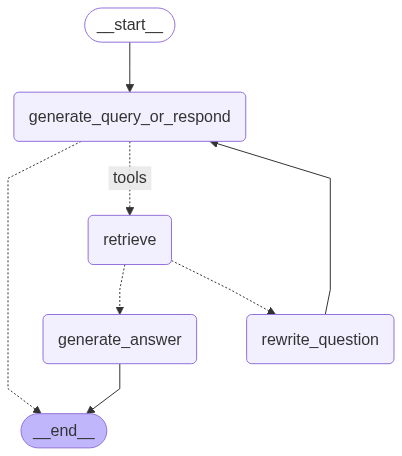

In [41]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))